# Import Packages

In [50]:
import pycaret
import numpy as np
import seaborn as sns
from pycaret.datasets import get_data
from pycaret.classification import *

In [2]:
dataset = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  24000 non-null  int64  
 1   SEX        24000 non-null  int64  
 2   EDUCATION  24000 non-null  int64  
 3   MARRIAGE   24000 non-null  int64  
 4   AGE        24000 non-null  int64  
 5   PAY_1      24000 non-null  int64  
 6   PAY_2      24000 non-null  int64  
 7   PAY_3      24000 non-null  int64  
 8   PAY_4      24000 non-null  int64  
 9   PAY_5      24000 non-null  int64  
 10  PAY_6      24000 non-null  int64  
 11  BILL_AMT1  24000 non-null  float64
 12  BILL_AMT2  24000 non-null  float64
 13  BILL_AMT3  24000 non-null  float64
 14  BILL_AMT4  24000 non-null  float64
 15  BILL_AMT5  24000 non-null  float64
 16  BILL_AMT6  24000 non-null  float64
 17  PAY_AMT1   24000 non-null  float64
 18  PAY_AMT2   24000 non-null  float64
 19  PAY_AMT3   24000 non-null  float64
 20  PAY_AM

In [48]:
dataset.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,...,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,167876.403333,1.600917,1.850958,1.553000,35.446708,-0.023875,-0.140500,-0.170000,-0.221500,-0.266833,...,43172.528083,40190.249458,38722.892708,5687.489833,5.928435e+03,5227.245458,4766.803417,4774.861792,5280.923917,0.221083
std,129907.454723,0.489720,0.787361,0.521331,9.180845,1.123806,1.194216,1.198712,1.171784,1.133220,...,64075.909188,60385.391344,59259.183390,17011.021882,2.423232e+04,17918.982291,15421.988078,15400.224129,18214.205137,0.414985
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-53007.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2294.000000,1718.500000,1238.000000,1000.000000,8.200000e+02,390.000000,285.000000,239.750000,111.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19000.000000,18059.500000,16846.000000,2102.500000,2.013000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54837.250000,50320.000000,49327.500000,5011.000000,5.000000e+03,4512.000000,4040.250000,4024.250000,4010.500000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [49]:
dataset.default.value_counts()

0    18694
1     5306
Name: default, dtype: int64

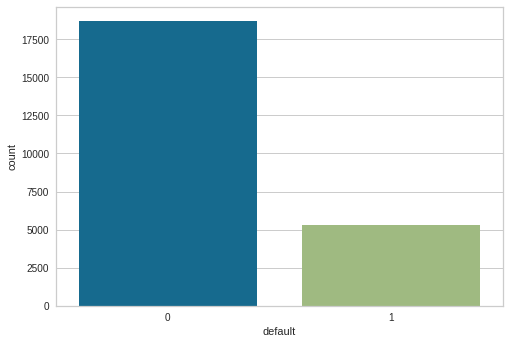

In [51]:
sns.countplot(dataset.default)

In [3]:
#check the shape of data
dataset.shape

(24000, 24)

In [53]:
dataset.isnull().any()

LIMIT_BAL    False
SEX          False
EDUCATION    False
MARRIAGE     False
AGE          False
PAY_1        False
PAY_2        False
PAY_3        False
PAY_4        False
PAY_5        False
PAY_6        False
BILL_AMT1    False
BILL_AMT2    False
BILL_AMT3    False
BILL_AMT4    False
BILL_AMT5    False
BILL_AMT6    False
PAY_AMT1     False
PAY_AMT2     False
PAY_AMT3     False
PAY_AMT4     False
PAY_AMT5     False
PAY_AMT6     False
default      False
dtype: bool

# Create Unseen data from the Given Dataset

In [43]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Training: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Training: (22800, 24)
Unseen Data For Predictions: (1200, 24)


Step1: Experiment Set Up

In [5]:
exp_clf101 = setup(data = data, target = 'default', session_id=123)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(22800, 24)"
4,Missing Values,False
5,Numeric Features,14
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [54]:
#exp_clf102 = setup(data = data, target = 'default', session_id=123,fix_imbalance=True)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(22800, 24)"
4,Missing Values,False
5,Numeric Features,14
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


Step 2 : Compare Models

In [55]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Gradient Boosting Classifier,0.8220,0.7864,0.3776,0.6750,0.4841,0.3867,0.4107,12.9754
1,Ada Boost Classifier,0.8214,0.7705,0.4006,0.6588,0.4979,0.3971,0.4155,3.0082
2,Light Gradient Boosting Machine,0.8203,0.7844,0.3890,0.6594,0.4891,0.3888,0.4088,1.5447
3,CatBoost Classifier,0.8200,0.7818,0.3986,0.6532,0.4948,0.3930,0.4109,16.8950
4,Extreme Gradient Boosting,0.8151,0.7672,0.3924,0.6325,0.4841,0.3789,0.3951,9.6086
5,Extra Trees Classifier,0.8071,0.7474,0.3972,0.5964,0.4766,0.3642,0.3756,0.5005
6,Random Forest Classifier,0.8060,0.7324,0.3654,0.6015,0.4543,0.3449,0.3609,0.1302
7,Ridge Classifier,0.7856,0.0000,0.5649,0.5145,0.5382,0.3990,0.4000,0.0591
8,Linear Discriminant Analysis,0.7854,0.7682,0.5640,0.5143,0.5377,0.3985,0.3994,0.2931
9,Quadratic Discriminant Analysis,0.7625,0.7144,0.2380,0.6112,0.2694,0.1813,0.2408,0.1004


In [7]:
print(best_model)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)


In [8]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


In [9]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7224,0.6109,0.4108,0.3816,0.3956,0.2158,0.2160
1,0.7199,0.6225,0.4448,0.3848,0.4126,0.2300,0.2310
2,0.7400,0.6310,0.4363,0.4162,0.4260,0.2580,0.2582
3,0.7262,0.6094,0.3966,0.3846,0.3905,0.2140,0.2140
4,0.7306,0.6090,0.3909,0.3909,0.3909,0.2180,0.2180
5,0.7331,0.6381,0.4646,0.4090,0.4350,0.2612,0.2621
6,0.7155,0.6137,0.4306,0.3753,0.4011,0.2157,0.2166
7,0.7462,0.6363,0.4391,0.4282,0.4336,0.2701,0.2701
8,0.7318,0.6209,0.4221,0.3995,0.4105,0.2371,0.2372
9,0.7354,0.6194,0.4079,0.4034,0.4056,0.2355,0.2355


In [10]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [11]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7412,0.5881,0.1671,0.3315,0.2222,0.0868,0.0941
1,0.7350,0.5787,0.1473,0.2989,0.1973,0.0601,0.0655
2,0.7632,0.6641,0.2096,0.4277,0.2814,0.1590,0.1735
3,0.7462,0.5982,0.1530,0.3375,0.2105,0.0842,0.0936
4,0.7550,0.6096,0.2040,0.3956,0.2692,0.1397,0.1508
5,0.7607,0.6200,0.1841,0.4088,0.2539,0.1351,0.1504
6,0.7406,0.5884,0.1700,0.3315,0.2247,0.0880,0.0951
7,0.7600,0.6139,0.1898,0.4085,0.2592,0.1383,0.1528
8,0.7487,0.6106,0.1898,0.3681,0.2505,0.1177,0.1270
9,0.7542,0.6254,0.1870,0.3860,0.2519,0.1256,0.1374


In [12]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8095,0.7531,0.3428,0.6269,0.4432,0.3400,0.3626
1,0.8127,0.7451,0.3399,0.6452,0.4453,0.3453,0.3710
2,0.8076,0.7714,0.3258,0.6250,0.4283,0.3262,0.3512
3,0.7989,0.7185,0.3144,0.5842,0.4088,0.3006,0.3215
4,0.8051,0.7249,0.3229,0.6129,0.4230,0.3191,0.3428
5,0.8152,0.7324,0.3569,0.6495,0.4607,0.3603,0.3839
6,0.8039,0.7244,0.3371,0.6010,0.4319,0.3246,0.3444
7,0.8158,0.7711,0.3399,0.6630,0.4494,0.3523,0.3807
8,0.8139,0.7183,0.3258,0.6609,0.4364,0.3400,0.3706
9,0.8107,0.7419,0.3569,0.6269,0.4549,0.3506,0.3710


Step 3 : Tune the Model

In [13]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8271,0.7213,0.3258,0.7516,0.4545,0.3703,0.4162
1,0.8208,0.7211,0.3031,0.7279,0.4280,0.3425,0.3889
2,0.8120,0.7155,0.3484,0.6373,0.4505,0.3487,0.3719
3,0.8114,0.7089,0.2691,0.6884,0.3870,0.2999,0.3463
4,0.8195,0.6942,0.2975,0.7241,0.4217,0.3362,0.3831
5,0.8239,0.7059,0.3031,0.7535,0.4323,0.3498,0.4008
6,0.8095,0.7130,0.2663,0.6763,0.3821,0.2939,0.3387
7,0.8271,0.7433,0.2918,0.7984,0.4274,0.3505,0.4124
8,0.8164,0.7094,0.2720,0.7273,0.3959,0.3132,0.3661
9,0.8150,0.6921,0.3626,0.6465,0.4646,0.3633,0.3856


In [14]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=76, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [16]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})
print(tuned_knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7788,0.6377,0.0567,0.5000,0.1018,0.0594,0.1077
1,0.7807,0.6641,0.0397,0.5600,0.0741,0.0462,0.1030
2,0.7820,0.6994,0.0595,0.5676,0.1077,0.0686,0.1286
3,0.7813,0.6431,0.0510,0.5625,0.0935,0.0589,0.1176
4,0.7782,0.6417,0.0482,0.4857,0.0876,0.0497,0.0954
5,0.7838,0.6777,0.0680,0.6000,0.1221,0.0807,0.1463
6,0.7845,0.6421,0.0312,0.8462,0.0601,0.0451,0.1365
7,0.7776,0.6625,0.0567,0.4762,0.1013,0.0569,0.1010
8,0.7719,0.6287,0.0340,0.3429,0.0619,0.0229,0.0439
9,0.7768,0.6666,0.0425,0.4545,0.0777,0.0414,0.0817


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')


In [17]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8258,0.7863,0.3654,0.7049,0.4813,0.3891,0.4194
1,0.8227,0.7977,0.3541,0.6944,0.4690,0.3758,0.4066
2,0.8233,0.8225,0.3853,0.6766,0.4910,0.3937,0.4165
3,0.8177,0.7713,0.3598,0.6615,0.4661,0.3675,0.3923
4,0.8227,0.7805,0.3513,0.6966,0.4670,0.3743,0.4059
5,0.8227,0.7955,0.3683,0.6842,0.4788,0.3834,0.4101
6,0.8158,0.7568,0.3371,0.6648,0.4474,0.3507,0.3799
7,0.8377,0.7941,0.3768,0.7733,0.5067,0.4231,0.4623
8,0.8227,0.7671,0.3569,0.6923,0.4710,0.3773,0.4073
9,0.8138,0.7833,0.3654,0.6386,0.4649,0.3621,0.3828


In [18]:
lgbm  = create_model('lightgbm') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8208,0.7835,0.3796,0.6667,0.4838,0.3851,0.4074
1,0.8246,0.7941,0.3796,0.6872,0.4891,0.3936,0.4189
2,0.8195,0.8193,0.4108,0.6444,0.5017,0.3981,0.4131
3,0.8214,0.7741,0.3824,0.6683,0.4865,0.3879,0.4101
4,0.8221,0.7832,0.3824,0.6716,0.4874,0.3894,0.4120
5,0.8214,0.7938,0.3994,0.6589,0.4974,0.3966,0.4150
6,0.8183,0.7628,0.3824,0.6522,0.4821,0.3809,0.4009
7,0.8340,0.7950,0.3966,0.7292,0.5138,0.4240,0.4526
8,0.8189,0.7664,0.3711,0.6616,0.4755,0.3764,0.3994
9,0.8132,0.7865,0.3938,0.6233,0.4826,0.3756,0.3904


In [21]:
tuned_lightgbm = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8214,0.7800,0.3824,0.6683,0.4865,0.3879,0.4101
1,0.8221,0.7908,0.3768,0.6751,0.4836,0.3864,0.4104
2,0.8258,0.8215,0.4278,0.6652,0.5207,0.4203,0.4356
3,0.8221,0.7786,0.3768,0.6751,0.4836,0.3864,0.4104
4,0.8271,0.7762,0.3853,0.6974,0.4964,0.4023,0.4281
5,0.8246,0.7969,0.4051,0.6714,0.5053,0.4065,0.4257
6,0.8208,0.7662,0.3824,0.6650,0.4856,0.3865,0.4082
7,0.8333,0.7962,0.4023,0.7208,0.5164,0.4253,0.4517
8,0.8214,0.7638,0.3683,0.6771,0.4771,0.3805,0.4062
9,0.8138,0.7800,0.4023,0.6228,0.4888,0.3814,0.3950


Step 4 : Plot Models

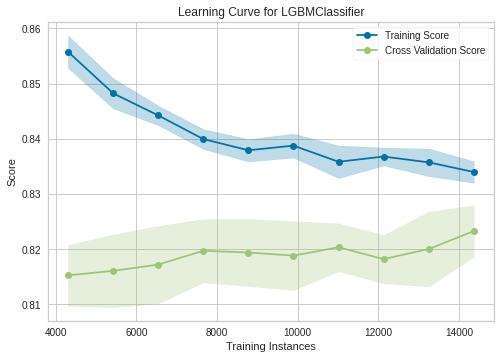

In [45]:
plot_model(estimator = tuned_lightgbm, plot = 'learning')


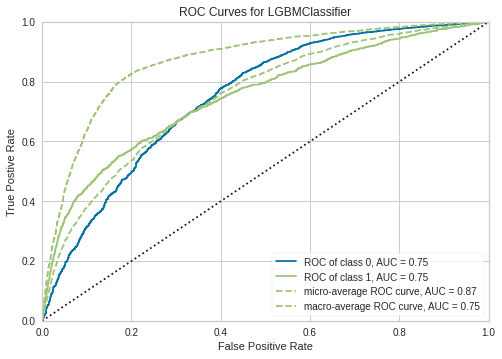

In [22]:
plot_model(estimator = tuned_lightgbm, plot = 'auc')


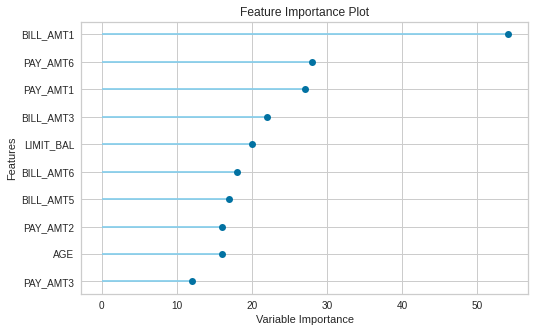

In [23]:
plot_model(estimator = tuned_lightgbm, plot = 'feature')


Step 4: Evaluate Model

In [24]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

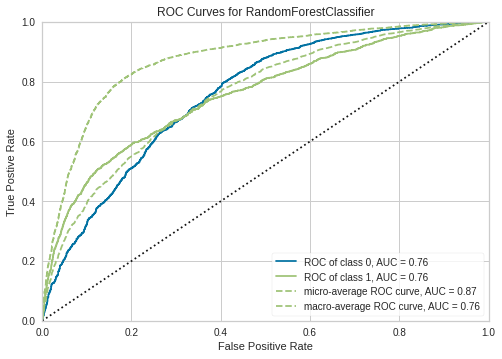

In [29]:
plot_model(tuned_rf, plot = 'auc')

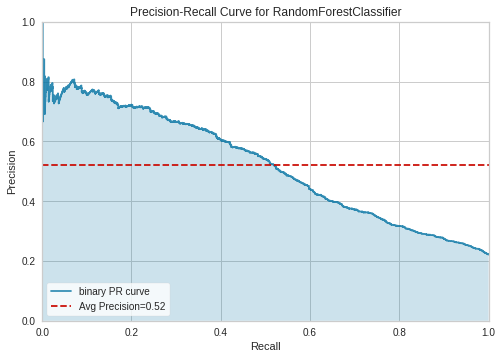

In [30]:
plot_model(tuned_rf, plot = 'pr')

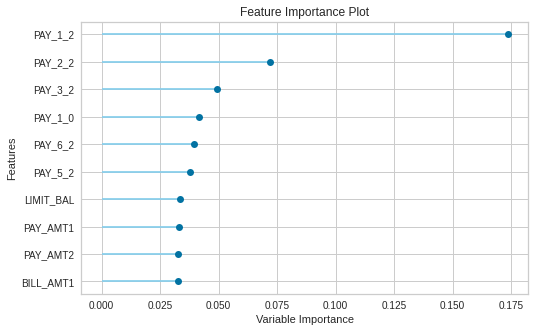

In [31]:
plot_model(tuned_rf, plot='feature')


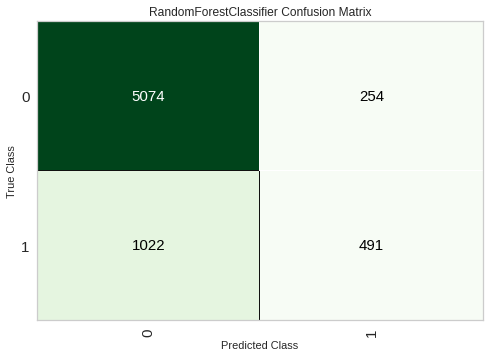

In [32]:
plot_model(tuned_rf, plot = 'confusion_matrix')


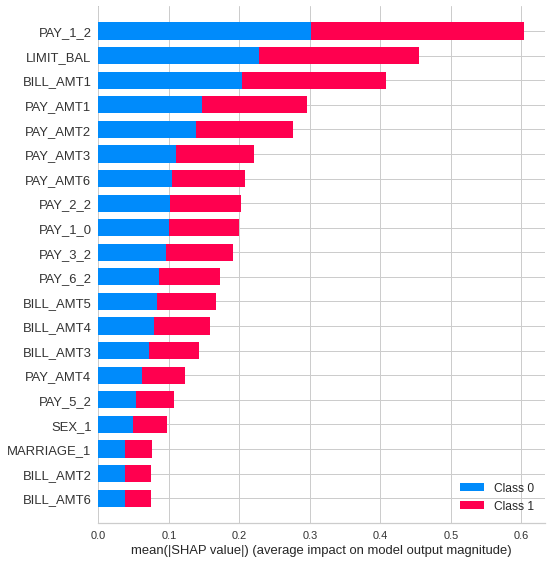

In [26]:
interpret_model(tuned_lightgbm)

In [33]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Step 6: Predict MOdel

In [34]:
predict_model(tuned_rf);


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8135,0.7563,0.3245,0.6591,0.4349,0.3383,0.3688


In [36]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8345,0.8222,0.3629,0.7657,0.4924,0.4082,0.4489


Step 7: Finalize

In [35]:
final_rf = finalize_model(tuned_rf)


In [37]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,100000,2,2,2,23,0,-1,-1,0,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.1891
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.0481
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.1685
3,200000,1,1,1,53,2,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,1,0.7434
4,240000,1,1,2,41,1,-1,-1,0,0,...,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.2173


In [38]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.default, unseen_predictions.Label, 'Accuracy')

0.8125

Step 8: Save Model

In [39]:
save_model(final_rf,'Final RF Model 08Feb2020')

Transformation Pipeline and Model Succesfully Saved


In [40]:
saved_final_rf = load_model('Final RF Model 08Feb2020')

Transformation Pipeline and Model Sucessfully Loaded


In [41]:
new_prediction = predict_model(saved_final_rf, data=data_unseen)

Some Advanced Techniques

In [28]:
logr  = create_model('lr');      
xgb   = create_model('xgboost');            

#blending 3 models
blend = blend_models(estimator_list=[tuned_lightgbm,logr,xgb])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8271,0.0000,0.3598,0.7175,0.4792,0.3890,0.4224
1,0.8164,0.0000,0.3031,0.6948,0.4221,0.3324,0.3729
2,0.8252,0.0000,0.3654,0.7011,0.4804,0.3876,0.4174
3,0.8170,0.0000,0.3173,0.6871,0.4341,0.3422,0.3786
4,0.8252,0.0000,0.3399,0.7229,0.4624,0.3738,0.4119
5,0.8183,0.0000,0.3314,0.6842,0.4466,0.3532,0.3865
6,0.8139,0.0000,0.3258,0.6609,0.4364,0.3400,0.3706
7,0.8283,0.0000,0.3399,0.7453,0.4669,0.3812,0.4230
8,0.8152,0.0000,0.3088,0.6812,0.4250,0.3329,0.3700
9,0.8157,0.0000,0.3456,0.6595,0.4535,0.3554,0.3823
